<a href="https://colab.research.google.com/github/JunHyeong-data/ML-DL-Study/blob/main/Basic_Deep_Learning/13_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 170M/170M [00:02<00:00, 76.7MB/s]


50000
<class 'torchvision.datasets.cifar.CIFAR10'>
label: 2
shape: (32, 32, 3)


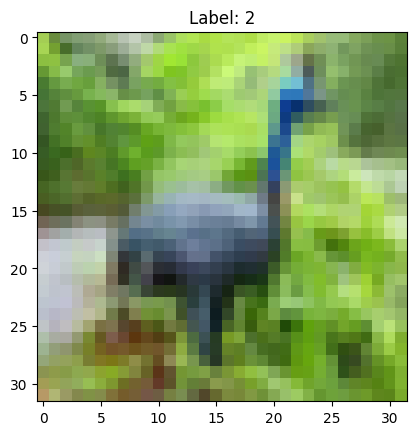

In [1]:
from torchvision import datasets
import numpy as np
import matplotlib.pyplot as plt

CIFAR10_trainset = datasets.CIFAR10(root='./data', train=True, download=True)
print(len(CIFAR10_trainset))
print(type(CIFAR10_trainset))

CIFAR10_img, CIFAR10_label = CIFAR10_trainset[6]
CIFAR10_img_array = np.array(CIFAR10_img)
print(f"label: {CIFAR10_label}")
print(f"shape: {CIFAR10_img_array.shape}")
# Display the image
plt.imshow(CIFAR10_img_array)  # No need for cmap='gray' for CIFAR10
plt.title(f'Label: {CIFAR10_label}')
plt.show()

In [4]:
from torch.nn.modules.activation import ReLU
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)

val_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=128, shuffle=False)
print(val_loader)
# 2. Define the mynet model
class MyNet(nn.Module):
    def __init__(self, input_size: int, hidden_size: int, output_size: int):
        super().__init__()
        self.seq_model = nn.Sequential(
            nn.Linear(input_size, hidden_size, bias=True),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size, bias=True),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size, bias=True),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(hidden_size, hidden_size, bias=True),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(hidden_size, output_size)
        )
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = x.view(x.size(0), -1)
        return self.seq_model(x)

mynet = MyNet(input_size=32*32*3, hidden_size=128, output_size=10)

In [5]:
mynet.eval()
correct_count = 0
with torch.no_grad():
  for data, label in val_loader:
    scores = mynet(data)
    predicted = scores.argmax(dim=1)
    correct_count += predicted.eq(label).sum().item()
  val_accuracy = 100 *correct_count / len(val_loader.dataset)

print(f"First Validation accuracy: {val_accuracy:.2f}%")

First Validation accuracy: 9.80%


In [7]:
from torch.backends.mps import is_available
import torch
import torchvision
import matplotlib.pyplot as plt

if torch.backends.mps.is_available():
  my_device = torch.device('mps')
elif torch.cuda.is_available():
  my_device = torch.device('cuda')
else:
  my_device = torch.device('cpu')

print(my_device)

cpu


In [8]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(mynet.parameters(), lr=0.001)

mynet.to(my_device)
num_epochs = 100
for epoch in range(num_epochs):
  mynet.train()
  for batch_idx, (data, label) in enumerate(train_loader):
    data, label = data.to(my_device), label.to(my_device)
    scores = mynet(data)
    loss = loss_fn(scores, label)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  mynet.eval()
  val_loss = 0.0
  correct = 0
  with torch.no_grad():
    for data, label in val_loader:
      data, label = data.to(my_device), label.to(my_device)
      scores = mynet(data)
      loss = loss_fn(scores, label)
      val_loss += loss.item() * data.size(0)

      predicted = scores.argmax(dim=1)
      correct += predicted.eq(label).sum().item()
  val_loss /= len(val_loader.dataset)
  val_accuracy = 100 * correct / len(val_loader.dataset)
  print(f"Epoch [{epoch + 1}/{num_epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

Epoch [1/100], Training Loss: 1.6005, Validation Loss: 1.6026, Validation Accuracy: 43.36%
Epoch [2/100], Training Loss: 1.3908, Validation Loss: 1.5029, Validation Accuracy: 46.88%
Epoch [3/100], Training Loss: 1.4793, Validation Loss: 1.4413, Validation Accuracy: 48.96%
Epoch [4/100], Training Loss: 1.3785, Validation Loss: 1.4177, Validation Accuracy: 49.95%
Epoch [5/100], Training Loss: 1.4383, Validation Loss: 1.3884, Validation Accuracy: 50.81%
Epoch [6/100], Training Loss: 1.3579, Validation Loss: 1.3842, Validation Accuracy: 51.25%
Epoch [7/100], Training Loss: 1.2782, Validation Loss: 1.3682, Validation Accuracy: 51.44%
Epoch [8/100], Training Loss: 1.2103, Validation Loss: 1.3747, Validation Accuracy: 51.24%
Epoch [9/100], Training Loss: 1.2131, Validation Loss: 1.3703, Validation Accuracy: 52.28%
Epoch [10/100], Training Loss: 1.4204, Validation Loss: 1.3673, Validation Accuracy: 52.49%
Epoch [11/100], Training Loss: 1.4925, Validation Loss: 1.3561, Validation Accuracy: 52.7

KeyboardInterrupt: 